In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# from Ipython import display
# display.set_matplotlib_formats('svg')

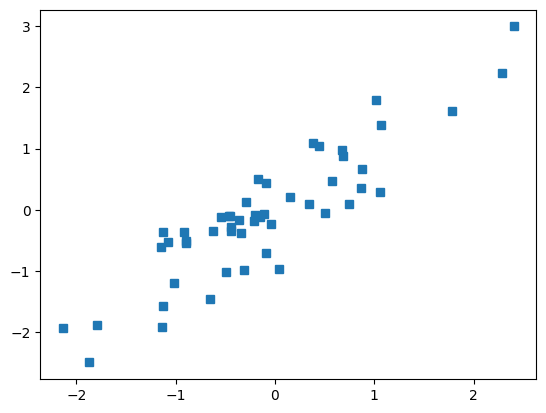

In [ ]:
N=50
X=torch.randn(N,1)
y=X+torch.randn(N,1)/2
plt.plot(X,y,'s')
plt.show()

In [ ]:
#build model
ANNreg=nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
learning_rate=0.05
lossfn=nn.MSELoss()
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learning_rate)

In [ ]:
num_epochs=500
losses=torch.zeros(num_epochs)

#train the model
for epochi in range(num_epochs):
  # print(epochi) --0-499
  #forward pass
  yHat=ANNreg(X)

  #compute loss
  loss=lossfn(yHat,y)
  losses[epochi]=loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

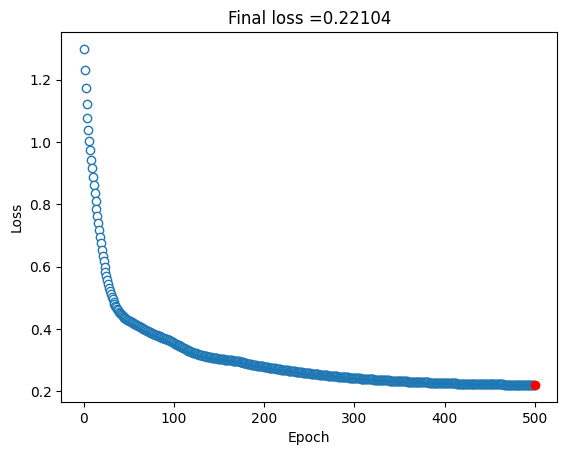

In [ ]:
#final forward pass
predictions=ANNreg(X)

#final loss MSE
testloss=(predictions-y).pow(2).mean()
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(num_epochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss =%g' %testloss.item())
plt.show()

In [ ]:
print(testloss.detach())    #takes only value if it has value and attribute in word
print(testloss.item())

tensor(0.2210)
0.22103971242904663


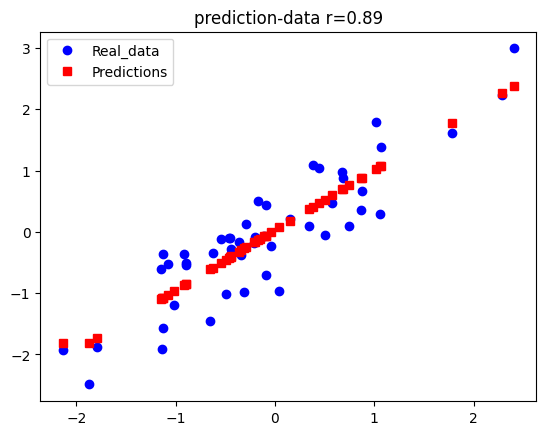

In [ ]:
#plot the data
plt.plot(X,y,'bo',label='Real_data')
plt.plot(X,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()